In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import accuracy_score

## Data Analysis

In [6]:
df = pd.read_csv('/Users/hari/Desktop/E-mail Spam Detection/emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [9]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/hari/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
df['text'] = df['text'].apply(word_tokenize)
df

,text,spam
0,"[Subject, :, naturally, irresistible, your, co...",1
1,"[Subject, :, the, stock, trading, gunslinger, ...",1
2,"[Subject, :, unbelievable, new, homes, made, e...",1
3,"[Subject, :, 4, color, printing, special, requ...",1
4,"[Subject, :, do, not, have, money, ,, get, sof...",1
...,...,...
5723,"[Subject, :, re, :, research, and, development...",0
5724,"[Subject, :, re, :, receipts, from, visit, jim...",0
5725,"[Subject, :, re, :, enron, case, study, update...",0
5726,"[Subject, :, re, :, interest, david, ,, please...",0


In [11]:
df['text'] = df['text'].apply(lambda x:[item for item in x if item.isalpha()])

In [12]:
df['text'] = df['text'].apply(lambda x:[item.lower() for item in x])

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/hari/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [16]:
df.head()

,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, color, printing, special, request, a...",1
4,"[subject, money, get, software, cds, software,...",1


In [17]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
df['text'] = df['text'].apply(lambda x: [ps.stem(item) for item in x ])

In [18]:
df

,text,spam
0,"[subject, natur, irresist, corpor, ident, lt, ...",1
1,"[subject, stock, trade, gunsling, fanni, merri...",1
2,"[subject, unbeliev, new, home, made, easi, im,...",1
3,"[subject, color, print, special, request, addi...",1
4,"[subject, money, get, softwar, cd, softwar, co...",1
...,...,...
5723,"[subject, research, develop, charg, gpg, forwa...",0
5724,"[subject, receipt, visit, jim, thank, invit, v...",0
5725,"[subject, enron, case, studi, updat, wow, day,...",0
5726,"[subject, interest, david, pleas, call, shirle...",0


In [19]:
df.head()

,text,spam
0,"[subject, natur, irresist, corpor, ident, lt, ...",1
1,"[subject, stock, trade, gunsling, fanni, merri...",1
2,"[subject, unbeliev, new, home, made, easi, im,...",1
3,"[subject, color, print, special, request, addi...",1
4,"[subject, money, get, softwar, cd, softwar, co...",1


In [20]:
df['text'] = df['text'].apply(lambda x: " ".join(x))

In [22]:
df.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject color print special request addit info...,1
4,subject money get softwar cd softwar compat gr...,1


### Test Train Split

In [24]:
train_text = df.text[:3500]
test_text = df.text[3500:]
train_spam = df.spam[:3500]
test_spam = df.spam[3500:]

In [25]:
df.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject color print special request addit info...,1
4,subject money get softwar cd softwar compat gr...,1


In [36]:
cv = CountVectorizer(min_df=0.0, max_df=1, binary = False, ngram_range = (1,3))

In [37]:
cv_train_text = cv.fit_transform(train_text)
cv_test_text = cv.transform(test_text)

In [38]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb_train_spam = lb.fit_transform(train_spam)
lb_test_spam = lb.fit_transform(test_spam)

## ACCURACY

In [39]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb_bow = mnb.fit(cv_train_text, lb_train_spam)
mnb_bow_predict = mnb.predict(cv_test_text)
mnb_bow_score = accuracy_score(lb_test_spam, mnb_bow_predict)
print("Accuracy :", mnb_bow_score*100," %")

Accuracy : 97.44165170556553  %


/Users/hari/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## MOST USED WORDS 

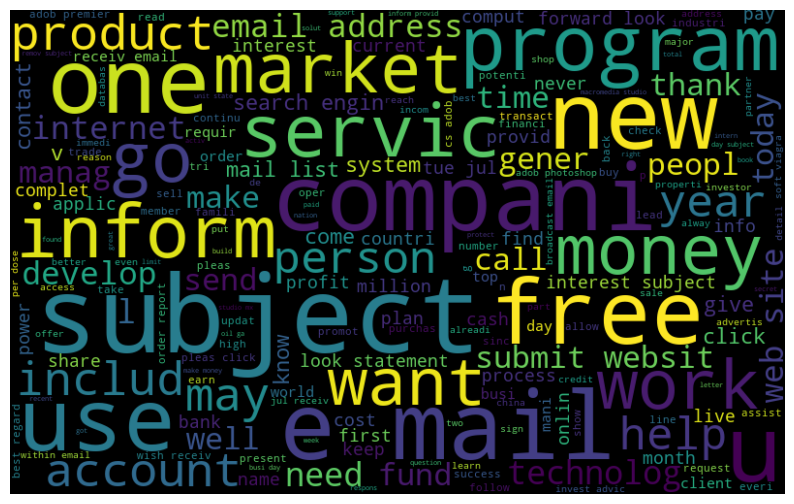

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


most_used_words = ' '.join(list(df[df['spam'] == 1]['text']))
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(most_used_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()